In [1]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 8.6 MB/s 
     |████████████████████████████████| 6.8 MB 53.1 MB/s 
     |████████████████████████████████| 596 kB 51.5 MB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
     |████████████████████████████████| 895 kB 54.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [1]:
from transformers import pipeline


In [2]:
import numpy as np


In [3]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   TFAutoModelForSequenceClassification,
   AdamW,
   glue_convert_examples_to_features
)
import tensorflow as tf
import tensorflow_datasets as tfds
import json

import transformers
from transformers import AutomaticSpeechRecognitionPipeline
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
# pipeline("<task-name>")

# # Using a user-specified model
# pipeline("<task-name>", model="<model_name>")

# Using custom model/tokenizer as str
nlp_features = pipeline('feature-extraction', model='bert-base-uncased', tokenizer='bert-base-uncased',device=0)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip -P *MaMiSemEval2022! "/content/drive/MyDrive/MAMI/MAMI DATASET/training.zip"

Streaming output truncated to the last 5000 lines.
  inflating: TRAINING/4665.jpg       
  inflating: TRAINING/4666.jpg       
  inflating: TRAINING/4667.jpg       
  inflating: TRAINING/4669.jpg       
  inflating: TRAINING/467.jpg        
  inflating: TRAINING/4670.jpg       
  inflating: TRAINING/4671.jpg       
  inflating: TRAINING/4673.jpg       
  inflating: TRAINING/4674.jpg       
  inflating: TRAINING/4675.jpg       
  inflating: TRAINING/4678.jpg       
  inflating: TRAINING/4679.jpg       
  inflating: TRAINING/468.jpg        
  inflating: TRAINING/4680.jpg       
  inflating: TRAINING/4681.jpg       
  inflating: TRAINING/4682.jpg       
  inflating: TRAINING/4683.jpg       
  inflating: TRAINING/4685.jpg       
  inflating: TRAINING/4686.jpg       
  inflating: TRAINING/4687.jpg       
  inflating: TRAINING/4688.jpg       
  inflating: TRAINING/4689.jpg       
  inflating: TRAINING/469.jpg        
  inflating: TRAINING/4690.jpg       
  inflating: TRAINING/4691.jpg       

In [5]:
df = pd.read_csv("/content/TRAINING/training.csv",sep="\t")

In [6]:
df

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription
0,1.jpg,0,0,0,0,0,Milk Milk.zip
1,10.jpg,1,0,0,0,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S..."
2,1000.jpg,0,0,0,0,0,BREAKING NEWS: Russia releases photo of DONALD...
3,10000.jpg,0,0,0,0,0,MAN SEEKING WOMAN Ignad 18 O
4,10006.jpg,0,0,0,0,0,Me explaining the deep lore of. J.R.R. Tolkein...
...,...,...,...,...,...,...,...
9995,15002.jpg,0,0,0,0,0,WAITING FOR THE END OF THE COVID imgflip.com
9996,15003.jpg,0,0,0,0,0,SMART WOMEN ARE AROUND imgflip.com
9997,15004.jpg,0,0,0,0,0,GOOD GIRLS ARE BEHIND THE CORNER imgflip.com
9998,15005.jpg,0,0,0,0,0,COOKING FOR MY WIFE imgflip.com


In [7]:
df_train, df_val = train_test_split(
  df,
  test_size=0.20,
  stratify = df.shaming.values,
  random_state=42
)
df_val, df_test = train_test_split(
  df_val,
  test_size=0.50,
  stratify = df_val.shaming.values,
  random_state=42
)


df_train.shape, df_val.shape

((8000, 7), (1000, 7))

In [8]:
df_train.head(1)

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription
1578,11676.jpg,0,0,0,0,0,"Hello Your wife was sent to space Yes, this is..."


In [9]:
df_train['Text Transcription'].values

array(['Hello Your wife was sent to space Yes, this is dog',
       "IMMA TELL YOU WHAT'S THE HARDEST THING ABOUT AGING AS A FEMALE: MY HAIR GROWS. IT GETS LONGER EVERY YEAR. WHAT DOESN'T CHANGE IS THAT IT ENDS RIGHT ABOVE MY NIPPLES. MEMEFUL.COM",
       "Look at my drunk ass boyfriend acting like he has to drink... DE Drink if you've made a woman cm before. drinkingGame BUZZED TED Mo Gazz Maria OBzNna BUZZED WARNING: This Is The Drinking Game That Gets You And Your Friends Wasted",
       ...,
       'WELL.. IN MY CAREER A MAN HAS ACCESS TO CERTAIN INFORMATION. S BUT SINCE NOW THE CORONAVIRUS IS GOING TO KILL US ALL THE FOLLOWING ANIMES ARE HENTAI Pr er primers Trummi Chu She Age My imots Koakun Hisoka Orp A The Pu Copy Tekno TeThe Antration New Ch King Fisting Ma G3 Butt Mama Pa 10 Of De ANABO Koto kibi TH Maryi Pa H Hans Time Hande A Hot T Minute Ek Bh Manga Ma Fat Fale Pare Gogen Kolon Yari G HC App The Ho',
       "OH LOOK SOMEONE'S VIA 9GAG.COM RETURNING A BROKEN SANDWICH MAKER 

In [10]:
train_features = nlp_features(list(df_train['Text Transcription'].values))

In [11]:
train_features_final = []
for feat in train_features:
  train_features_final.append(np.array(feat).mean(axis = 1))

In [12]:
len(train_features_final)

8000

In [13]:
del train_features

In [14]:
df_train ['features'] = train_features_final

In [15]:
df_train.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,features
1578,11676.jpg,0,0,0,0,0,"Hello Your wife was sent to space Yes, this is...","[[-0.012971454602458314, 0.15583427676132747, ..."
7155,6973.jpg,0,0,0,0,0,IMMA TELL YOU WHAT'S THE HARDEST THING ABOUT A...,"[[0.23872170914360819, -0.036901432453615074, ..."
2972,2463.jpg,0,0,0,0,0,Look at my drunk ass boyfriend acting like he ...,"[[0.04857504362113435, 0.13355938795615327, 0...."
2220,1627.jpg,1,0,1,0,0,DOING THE DISHES SHE IS DOING IT RIGHT,"[[0.11393597517162561, 0.09724805653095245, -0..."
1693,1251.jpg,1,1,0,0,0,IF PEOPLE EVOLVED FROM MONKEYS WHY DOES SARAH ...,"[[0.358140770966808, 0.10134741955402272, 0.04..."


In [16]:
del train_features_final

In [17]:
val_features = nlp_features(list(df_val['Text Transcription'].values))

In [18]:
val_features_final = []
for feat in val_features:
  val_features_final.append(np.array(feat).mean(axis = 1))

In [19]:
df_val ['features'] = val_features_final

In [20]:
test_features = nlp_features(list(df_test['Text Transcription'].values))

In [21]:
test_features_final = []
for feat in test_features:
  test_features_final.append(np.array(feat).mean(axis = 1))

In [22]:
df_test ['features'] = test_features_final

Image Features

In [23]:

   
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

# Load the pretrained model
model = models.resnet18(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
model.eval()

# Image transforms
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name).convert('RGB')
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(1, 512, 1, 512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data)
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding.numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [24]:
import os

In [25]:
img_features = []
for imgs in df_train.file_name.values[:5000]:
  img_features.append(get_vector(os.path.join("/content/TRAINING",imgs)))

In [26]:
final_img_features = []
for img_feat in img_features:
  final_img_features.append(img_feat.mean(axis=0).mean(axis=1).mean(axis = 0))

In [28]:
df_train = df_train.iloc[:5000,:]


In [29]:
df_train['image_features'] = final_img_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_train.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,features,image_features
1578,11676.jpg,0,0,0,0,0,"Hello Your wife was sent to space Yes, this is...","[[-0.012971454602458314, 0.15583427676132747, ...","[1.3082545, 1.3082545, 1.3082545, 1.3082545, 1..."
7155,6973.jpg,0,0,0,0,0,IMMA TELL YOU WHAT'S THE HARDEST THING ABOUT A...,"[[0.23872170914360819, -0.036901432453615074, ...","[0.74234736, 0.74234736, 0.74234736, 0.7423473..."
2972,2463.jpg,0,0,0,0,0,Look at my drunk ass boyfriend acting like he ...,"[[0.04857504362113435, 0.13355938795615327, 0....","[0.96140534, 0.96140534, 0.96140534, 0.9614053..."
2220,1627.jpg,1,0,1,0,0,DOING THE DISHES SHE IS DOING IT RIGHT,"[[0.11393597517162561, 0.09724805653095245, -0...","[0.9303541, 0.9303541, 0.9303541, 0.9303541, 0..."
1693,1251.jpg,1,1,0,0,0,IF PEOPLE EVOLVED FROM MONKEYS WHY DOES SARAH ...,"[[0.358140770966808, 0.10134741955402272, 0.04...","[0.97554684, 0.97554684, 0.97554684, 0.9755468..."


In [31]:
del final_img_features

In [ ]:
img_features = []
for imgs in df_val.file_name.values:
  img_features.append(get_vector(os.path.join("/content/train_images",imgs)))

In [ ]:
final_img_features = []
for img_feat in img_features:
  final_img_features.append(img_feat.mean(axis=0).mean(axis=1).mean(axis = 0))

In [ ]:
df_val['image_features'] = final_img_features

In [33]:
img_features = []
for imgs in df_test.file_name.values:
  img_features.append(get_vector(os.path.join("/content/TRAINING",imgs)))

In [34]:
final_img_features = []
for img_feat in img_features:
  final_img_features.append(img_feat.mean(axis=0).mean(axis=1).mean(axis = 0))

In [35]:
df_test['image_features'] = final_img_features

In [36]:
df_train['features'] = df_train['features'].apply(lambda x : x.mean(axis = 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_train.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,features,image_features
1578,11676.jpg,0,0,0,0,0,"Hello Your wife was sent to space Yes, this is...","[-0.012971454602458314, 0.15583427676132747, 0...","[1.3082545, 1.3082545, 1.3082545, 1.3082545, 1..."
7155,6973.jpg,0,0,0,0,0,IMMA TELL YOU WHAT'S THE HARDEST THING ABOUT A...,"[0.23872170914360819, -0.036901432453615074, 0...","[0.74234736, 0.74234736, 0.74234736, 0.7423473..."
2972,2463.jpg,0,0,0,0,0,Look at my drunk ass boyfriend acting like he ...,"[0.04857504362113435, 0.13355938795615327, 0.4...","[0.96140534, 0.96140534, 0.96140534, 0.9614053..."
2220,1627.jpg,1,0,1,0,0,DOING THE DISHES SHE IS DOING IT RIGHT,"[0.11393597517162561, 0.09724805653095245, -0....","[0.9303541, 0.9303541, 0.9303541, 0.9303541, 0..."
1693,1251.jpg,1,1,0,0,0,IF PEOPLE EVOLVED FROM MONKEYS WHY DOES SARAH ...,"[0.358140770966808, 0.10134741955402272, 0.049...","[0.97554684, 0.97554684, 0.97554684, 0.9755468..."


In [38]:
df_test.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription,features,image_features
2753,2225.jpg,0,0,0,0,0,When my girl asks me to stop walking around th...,"[[0.5697409943226845, 0.19042714372757943, 0.3...","[0.85141885, 0.85141885, 0.85141885, 0.8514188..."
8300,8182.jpg,1,0,0,1,0,wokedwease COUGARS They make great pets...,"[[0.48706905277712004, 0.24968881798642023, 0....","[0.79424876, 0.79424876, 0.79424876, 0.7942487..."
3241,2752.jpg,0,0,0,0,0,"Villagers: let's 3rd party him, he's low Holy ...","[[0.436208899098414, 0.29111696041568563, 0.49...","[0.7293816, 0.7293816, 0.7293816, 0.7293816, 0..."
3439,2977.jpg,0,0,0,0,0,WHEN YOUR PEANUT BUTTER CRACKERS ARE STUCK IN ...,"[[0.5270496993325651, 0.16117465605630593, 0.2...","[0.9704969, 0.9704969, 0.9704969, 0.9704969, 0..."
8183,8061.jpg,0,0,0,0,0,THIS DOESN'T CONCERN YOU JUST KEEP SCROLLING,"[[0.4779781164093451, -0.10813555612482807, 0....","[0.9989262, 0.9989262, 0.9989262, 0.9989262, 0..."


In [39]:
df_test['features'] = df_test['features'].apply(lambda x : x.mean(axis = 0))

In [41]:
training_embeddings_text = df_train.features.values
training_identifiers = df_train.file_name.values
training_labels = df_train.shaming.values

testing_embeddings_text = df_test.features.values
testing_identifiers = df_test.file_name.values
testing_labels = df_test.shaming.values

# assert(len(training_identifiers) == len(training_embeddings))
# assert(len(testing_identifiers) == len(testing_embeddings))

In [42]:
testing_embeddings_text.shape

(1000,)

In [43]:
training_embeddings_image = df_train.image_features.values
training_identifiers = df_train.file_name.values
training_labels = df_train.shaming.values

testing_embeddings_image = df_test.image_features.values
testing_identifiers = df_test.file_name.values
testing_labels = df_test.shaming.values

# assert(len(training_identifiers) == len(training_embeddings))
# assert(len(testing_identifiers) == len(testing_embeddings))

In [44]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(list(training_embeddings_text))  
training_embeddings_bert = scaler.transform(list(training_embeddings_text))  
# applying same transformation to test data
testing_embeddings_bert = scaler.transform(list(testing_embeddings_text)) 

In [45]:
scaler2 = StandardScaler()  
scaler2.fit(list(training_embeddings_image))  
training_embeddings_tfidf = scaler2.transform(list(training_embeddings_image))  
# applying same transformation to test data
testing_embeddings_tfidf = scaler2.transform(list(testing_embeddings_image)) 

In [46]:
training_embeddings = np. concatenate((training_embeddings_bert, training_embeddings_tfidf), axis=1)

In [47]:
from sklearn.neural_network import MLPClassifier


In [48]:
from sklearn.ensemble import BaggingClassifier


In [49]:
# training_labels = train.LABEL.values

In [50]:
clf = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes = 900, solver='adam',early_stopping = True, n_iter_no_change = 10, alpha= 0.010,random_state=10,verbose = True, max_iter=200),
                        n_estimators=10,verbose = 6, random_state=0).fit(list(training_embeddings), training_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
Iteration 1, loss = 0.54799222
Validation score: 0.888000
Iteration 2, loss = 0.26790835
Validation score: 0.922000
Iteration 3, loss = 0.19731308
Validation score: 0.906000
Iteration 4, loss = 0.13858522
Validation score: 0.922000
Iteration 5, loss = 0.09443234
Validation score: 0.940000
Iteration 6, loss = 0.07776759
Validation score: 0.932000
Iteration 7, loss = 0.06600342
Validation score: 0.940000
Iteration 8, loss = 0.05792414
Validation score: 0.940000
Iteration 9, loss = 0.05183381
Validation score: 0.938000
Iteration 10, loss = 0.04837599
Validation score: 0.936000
Iteration 11, loss = 0.04537254
Validation score: 0.938000
Iteration 12, loss = 0.04081114
Validation score: 0.946000
Iteration 13, loss = 0.04223449
Validation score: 0.942000
Iteration 14, loss = 0.03816578
Validation score: 0.942000
Iteration 15, loss = 0.03719679
Validation score: 0.942000
Iteration 16, loss = 0.03399620
Validation score: 0.940000
It

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min finished


In [51]:
testing_embeddings =  np. concatenate((testing_embeddings_bert, testing_embeddings_tfidf), axis=1)

In [ ]:
# testing_labels = testt.LABEL.values

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
predicted_testing_labels = clf.predict(testing_embeddings)
accuracy = accuracy_score(testing_labels, predicted_testing_labels)
print(f"The model has an accuracy of {accuracy:.2}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The model has an accuracy of 0.86


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


In [54]:
# testing_embeddings = testt.features.values
# testing_identifiers = testt.index.values
# testing_labels = testt.LABEL.values

In [55]:
# testing_embeddings = scaler.transform(list(testing_embeddings)) 

In [56]:
# predicted_testing_labels = clf.predict(testing_embeddings)
# accuracy = accuracy_score(testing_labels, predicted_testing_labels)
# print(f"The model has an accuracy of {accuracy:.2}")

In [57]:
from sklearn.metrics import confusion_matrix, classification_report


In [58]:
print(classification_report(testing_labels, predicted_testing_labels))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       873
           1       0.41      0.15      0.22       127

    accuracy                           0.86      1000
   macro avg       0.65      0.56      0.57      1000
weighted avg       0.83      0.86      0.84      1000



              precision    recall  f1-score   support

           0       0.89      0.97      0.93       873
           1       0.41      0.15      0.22       127

    accuracy                           0.86      1000
   macro avg       0.65      0.56      0.57      1000
weighted avg       0.83      0.86      0.84      1000



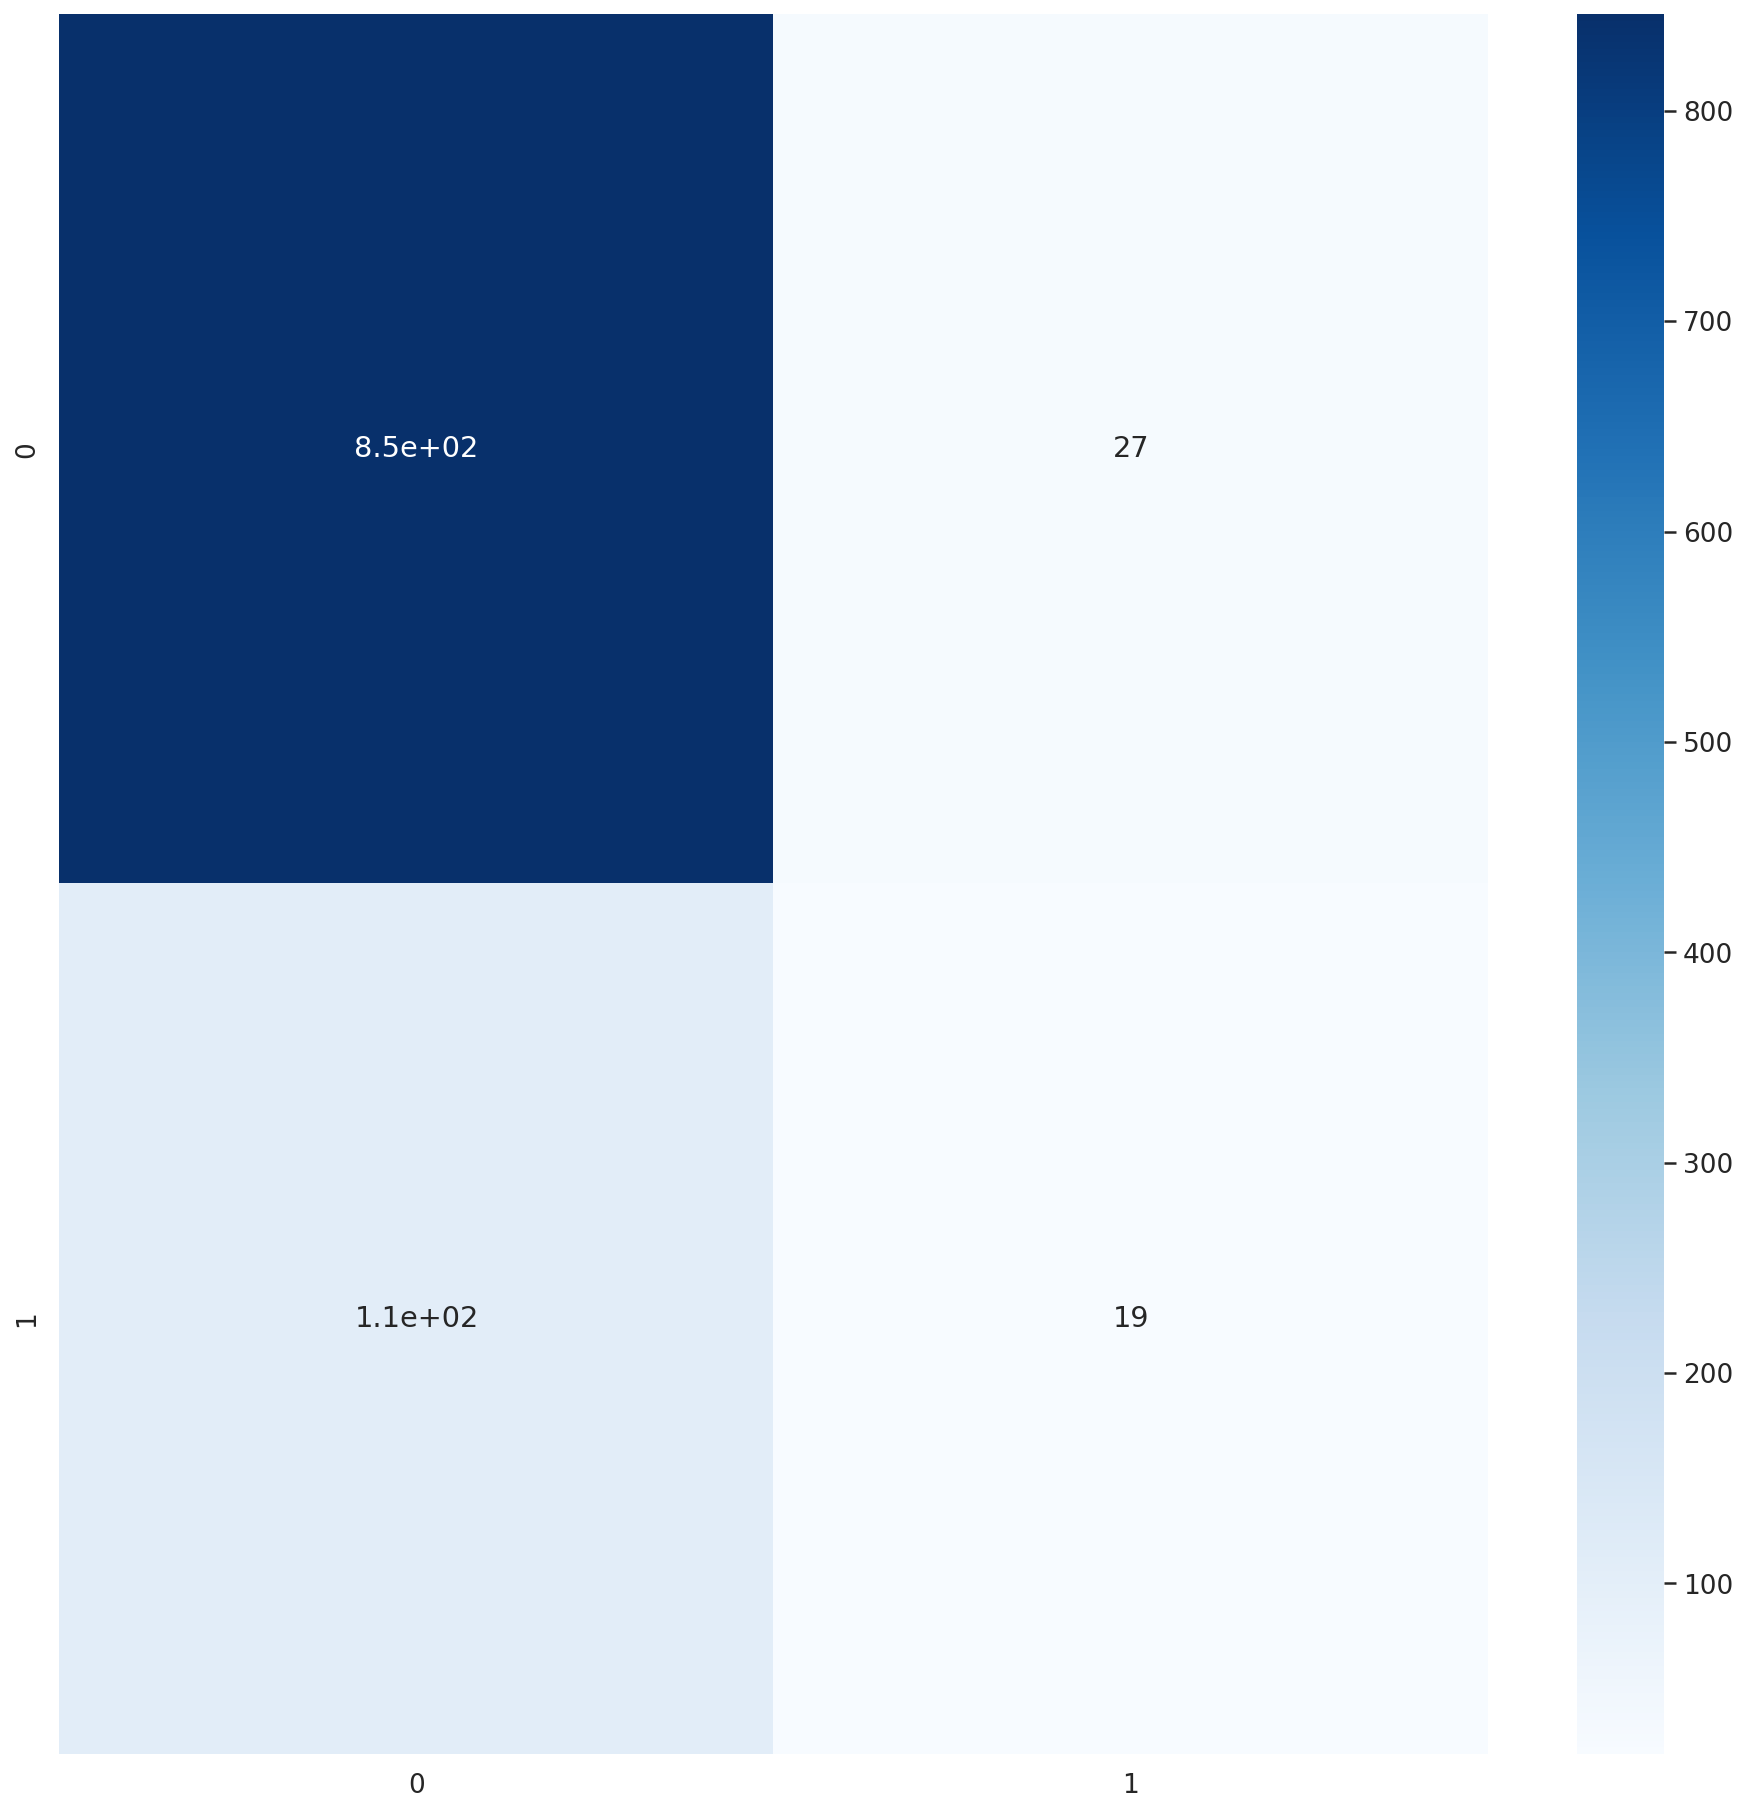

In [59]:
confusionmatrix = confusion_matrix(testing_labels, predicted_testing_labels)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(testing_labels, predicted_testing_labels))

In [60]:
from sklearn.metrics import roc_curve,confusion_matrix,auc


In [61]:
def roc_curve_plot(fpr,tpr,roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' %roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


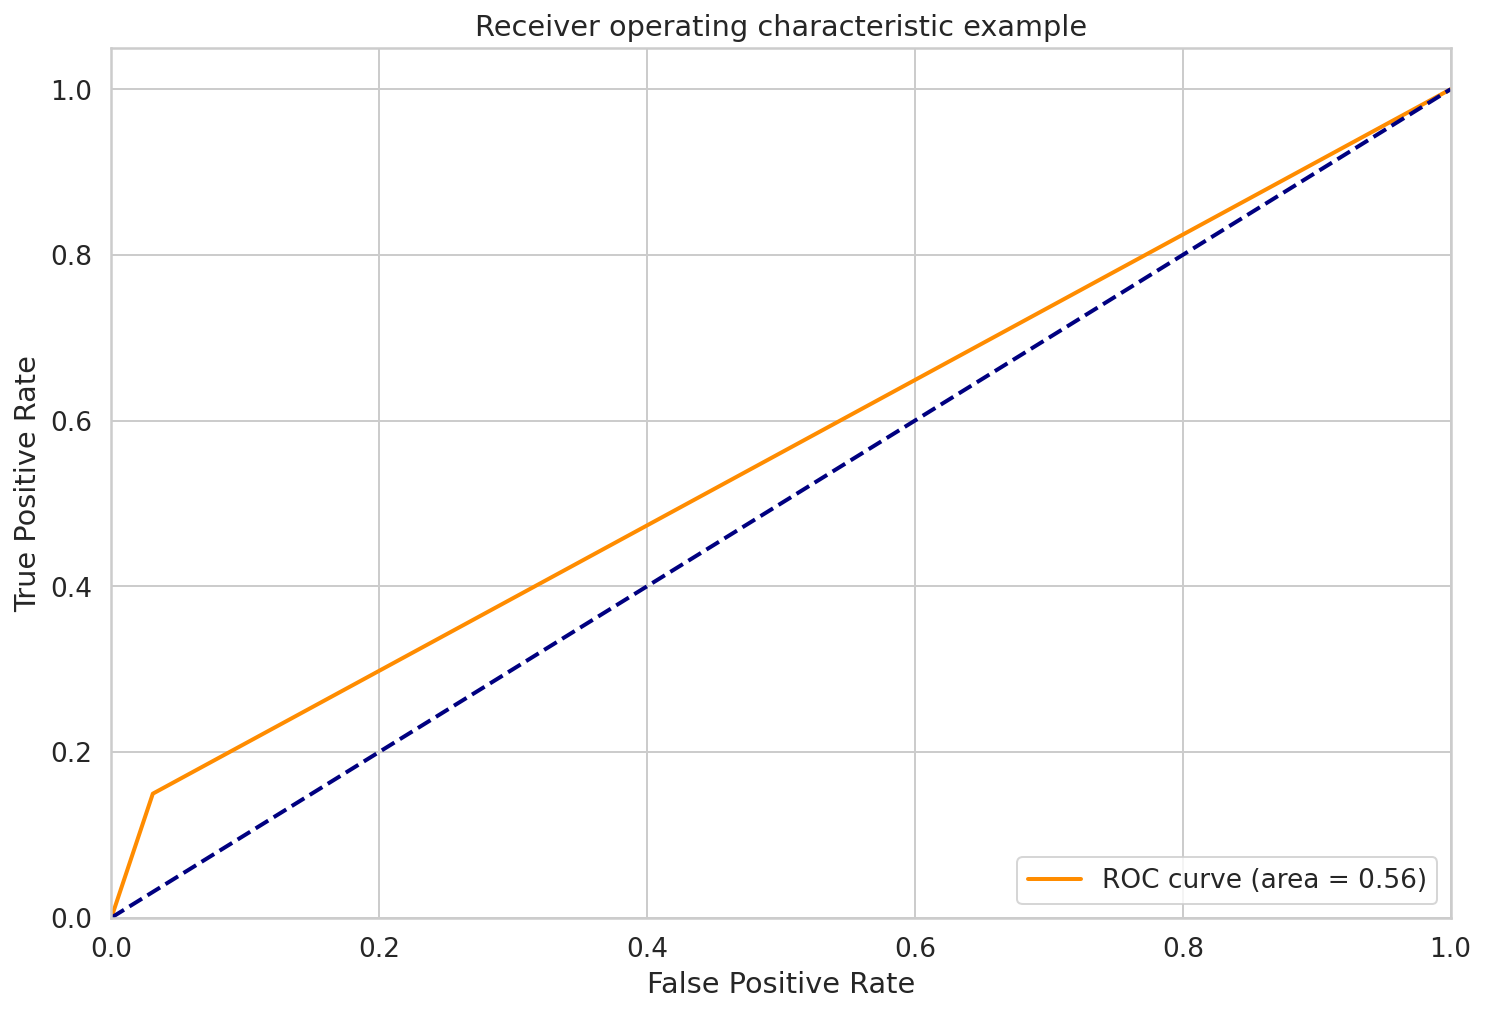

In [63]:
fpr, tpr, _ = roc_curve(testing_labels,predicted_testing_labels)
roc_auc = auc(fpr, tpr)
roc_curve_plot(fpr,tpr,roc_auc)
